In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np

In [101]:
time_results = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
value_results = pd.read_csv("results_heuristiques/value_heuristic_true.csv")

heuristics_codes = ["CW", "LK", "2opt", "3opt", "hybrid_rc", "hybrid_mc"]
heuristics_names =["Clark-Wright", "Lin-Kernighan", "2-opt on each route", "3-opt on each route", "Swap 2opt between routes (Real cost)","Swap 2opt between routes (Max cost)"]


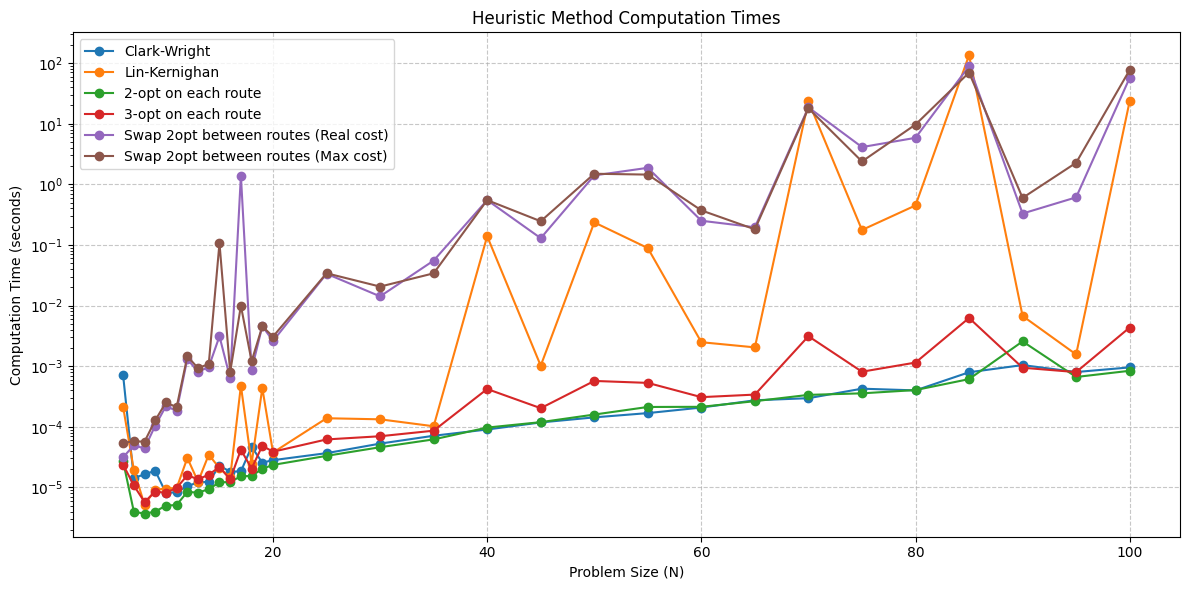

In [102]:
N = time_results.n.values

plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    plt.semilogy(N, time_results[code].values, label=name, marker='o')

plt.xlabel('Problem Size (N)')
plt.ylabel('Computation Time (seconds)')
plt.title('Heuristic Method Computation Times')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

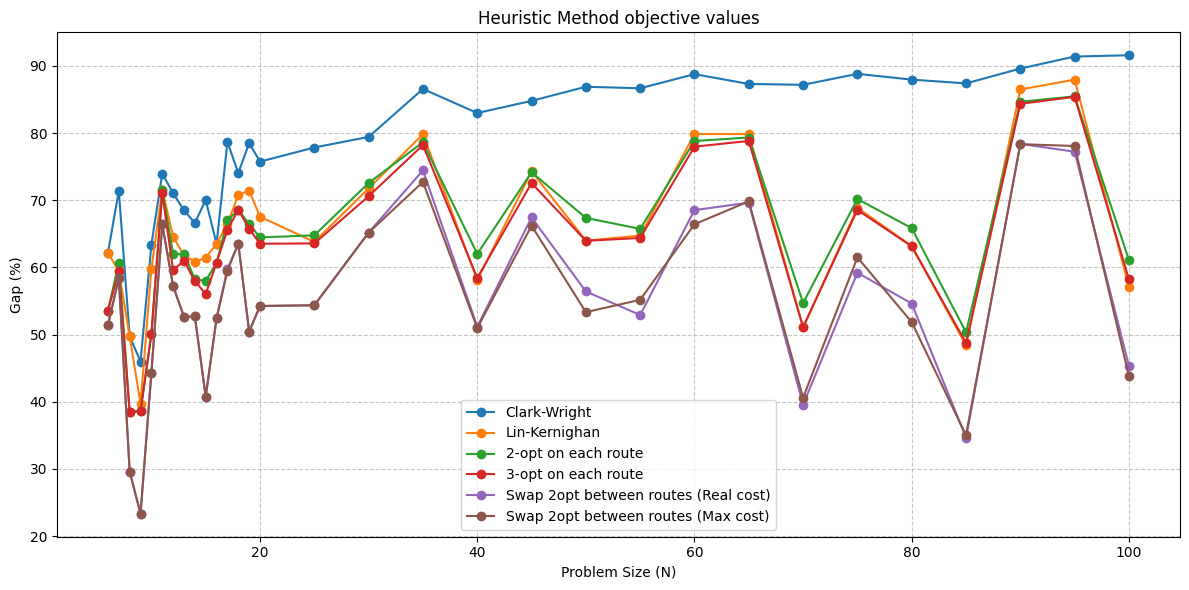

In [103]:
N = value_results.n.values

plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    Y = 100*(value_results[code].values - value_results["borne_inf"].values)/value_results[code].values
    plt.plot(N, Y, label=name, marker='o')

plt.xlabel('Problem Size (N)')
plt.ylabel('Gap (%)')
plt.title('Heuristic Method objective values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

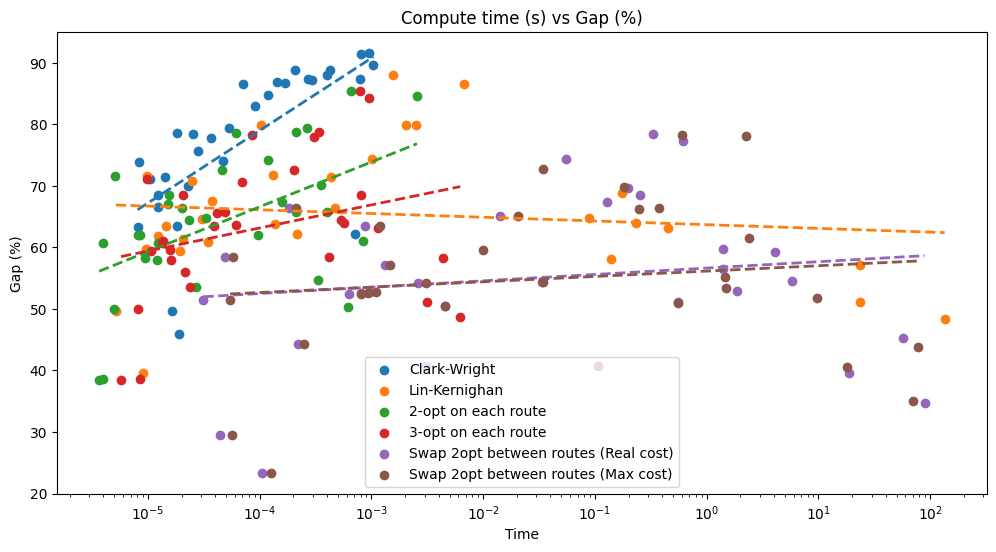

In [104]:
plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    
    Y = 100 * (value_results[code].values - value_results["borne_inf"].values) / value_results[code].values
    X = time_results[code].values
    log_X = [np.log10(x) for x in X]

    X_reshaped = np.array(log_X).reshape(-1, 1)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_reshaped, Y)
    
    plt.scatter(X, Y, label=name, marker='o')
    
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_log = [np.log10(x) for x in X_range]
    Y_pred = reg.predict(X_range_log)
    
    # Plot the regression line
    plt.plot(X_range, Y_pred, linewidth=2, ls='--')

# Set y-axis to logarithmic scale
plt.xscale('log')

plt.xlabel("Time")
plt.ylabel("Gap (%)")
plt.title("Compute time (s) vs Gap (%)")
plt.legend()
plt.show()


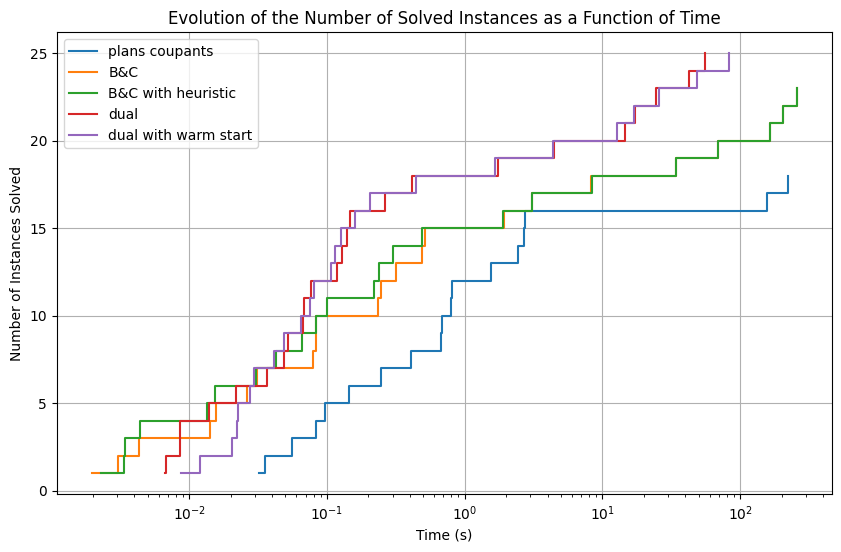

In [112]:
df = pd.read_csv("results_exact_methods/results_time.csv")

methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

for method in methods:
    # Extract the times (in seconds) for this method.
    times = df[method].values
    # Sort the times in ascending order.
    times_sorted = np.sort(times)
    times_filtered = times_sorted[times_sorted < 299]    
    # The cumulative count at each time is just 1, 2, …, N (number of instances)
    cumulative_counts = np.arange(1, len(times_filtered) + 1)
    
    # Plot a step function. The 'where="post"' argument ensures the step changes occur after the value.
    plt.step(times_filtered, cumulative_counts, where='post', label=method)

plt.xscale('log')
plt.xlabel("Time (s)")
plt.ylabel("Number of Instances Solved")
plt.title("Evolution of the Number of Solved Instances as a Function of Time")
plt.legend()
plt.grid(True)
plt.show()


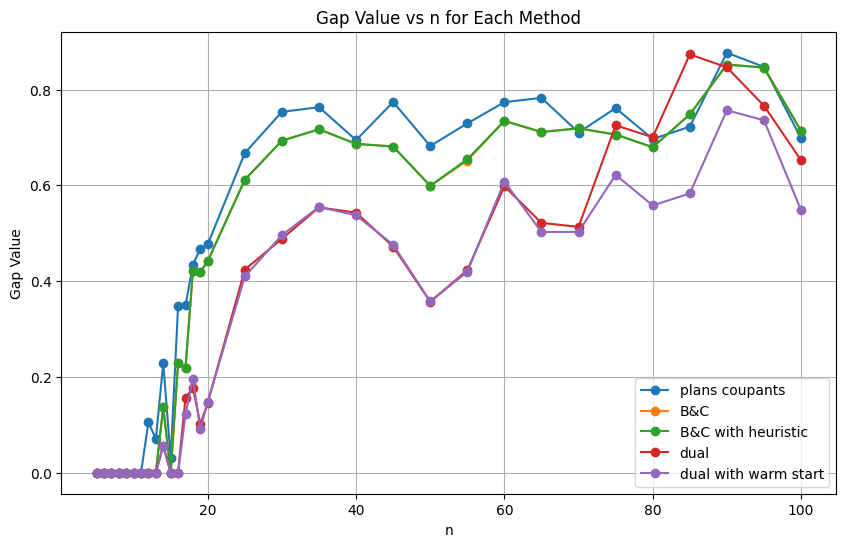

In [115]:
# Load the CSV file (adjust the file name/path as needed)
df = pd.read_csv("results_exact_methods/results_gap.csv")

# If you want one curve per method (averaging over the 'euclidien' column),
# group the data by 'n' and compute the mean for each method.
grouped = df.groupby("n").mean().reset_index()

# List of method columns to plot (these should match your CSV headers)
methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

# Plot a line (curve) for each method
for method in methods:
    plt.plot(grouped["n"], grouped[method], marker='o', label=method)

plt.xlabel("n")
plt.ylabel("Gap Value")
plt.title("Gap Value vs n for Each Method")
plt.legend()
plt.grid(True)
plt.show()


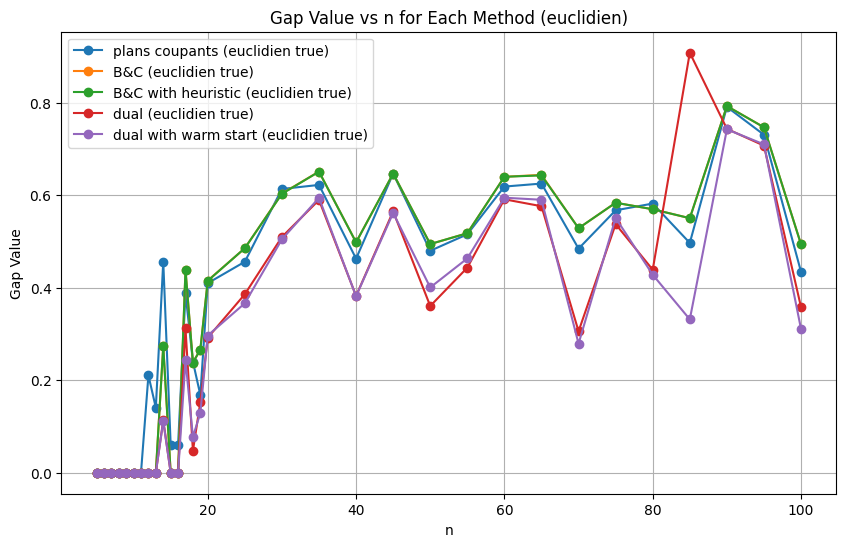

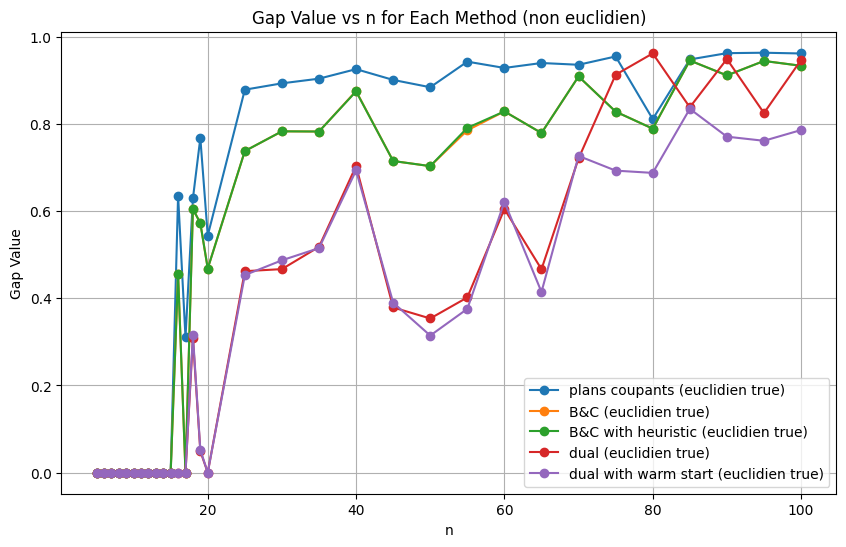

In [ ]:
# For euclidien == true:
df_true = df[df["euclidien"] == True].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method], marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap Value")
plt.title("Gap Value vs n for Each Method (euclidien)")
plt.legend()
plt.grid(True)
plt.show()

df_true = df[df["euclidien"] == False].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method], marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap Value")
plt.title("Gap Value vs n for Each Method (non euclidien)")
plt.legend()
plt.grid(True)
plt.show()